### Import neccessary libraries

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

#### Read data from csv file

In [22]:
df = pd.read_csv('../../data/processed/canonical_data.csv')
df.head()

,p_categories,p_brand,p_day_created,p_sold_quantity,p_original_price,p_discount_rate
0,7,155,659.0,0.041052,528000,49
1,84,198,974.0,7.554966,799000,46
2,84,192,1372.0,0.187097,209000,0
3,7,155,593.0,6.017157,473000,50
4,15,145,529.0,1.053469,106000,16


#### Train test split

In [23]:
X = df.drop('p_sold_quantity', axis='columns')
y = testLabels = df.p_sold_quantity

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

#### Create model

In [24]:
tree = DecisionTreeRegressor()
param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [25]:
# use grid search to test all values for n_neighbors 
gr_search = GridSearchCV(tree, param_grid, cv=10, scoring='neg_mean_squared_error')
gr_search.fit(X_train, y_train)
gr_search.best_params_

{'max_depth': 3}

#### Train model

In [26]:
model = DecisionTreeRegressor(max_depth=gr_search.best_params_.get('tree__max_depth'))
model.fit(X_train, y_train)

DecisionTreeRegressor()

#### Predict on test data

In [27]:
y_pred = model.predict(X_test)

#### Visualize the results 

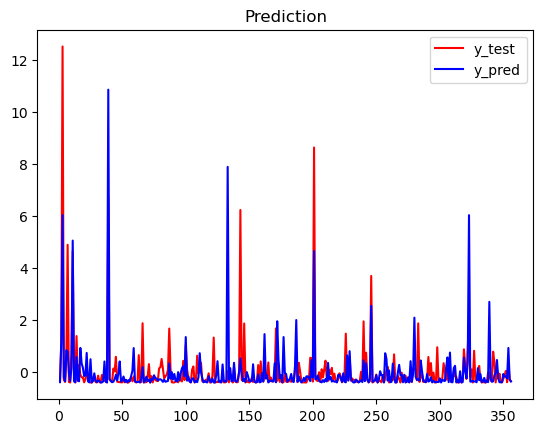

In [28]:
plot_predict = [i for i in range (1, len(y_test) + 1, 1)]
plt.plot(plot_predict,y_test, color='red', linestyle='-')
plt.plot(plot_predict,y_pred, color='blue', linestyle='-')
plt.legend(['y_test', 'y_pred'])
plt.title('Prediction')
plt.show()

#### Plot error distribution

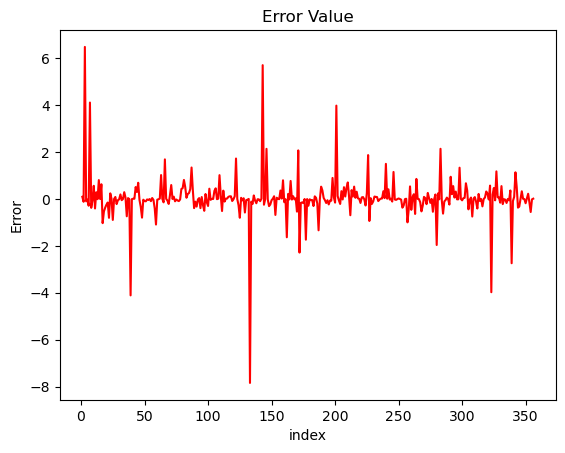

In [29]:
plot_error = [i for i in range(1, len(y_test) + 1, 1)]
plt.plot(plot_error, y_test - y_pred, color='red', linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

#### Evaluate model based on 

In [30]:
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE: 0.8200036175635863
MAE: 0.38155187272653984
RMSE: 0.9055405112768762


#### Result best estimator intercept and coefficients